## Comparison

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/Umap.jpg
" width="1000">


In [1]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species",width=1000,title='Scatter Matrix')
fig.show()

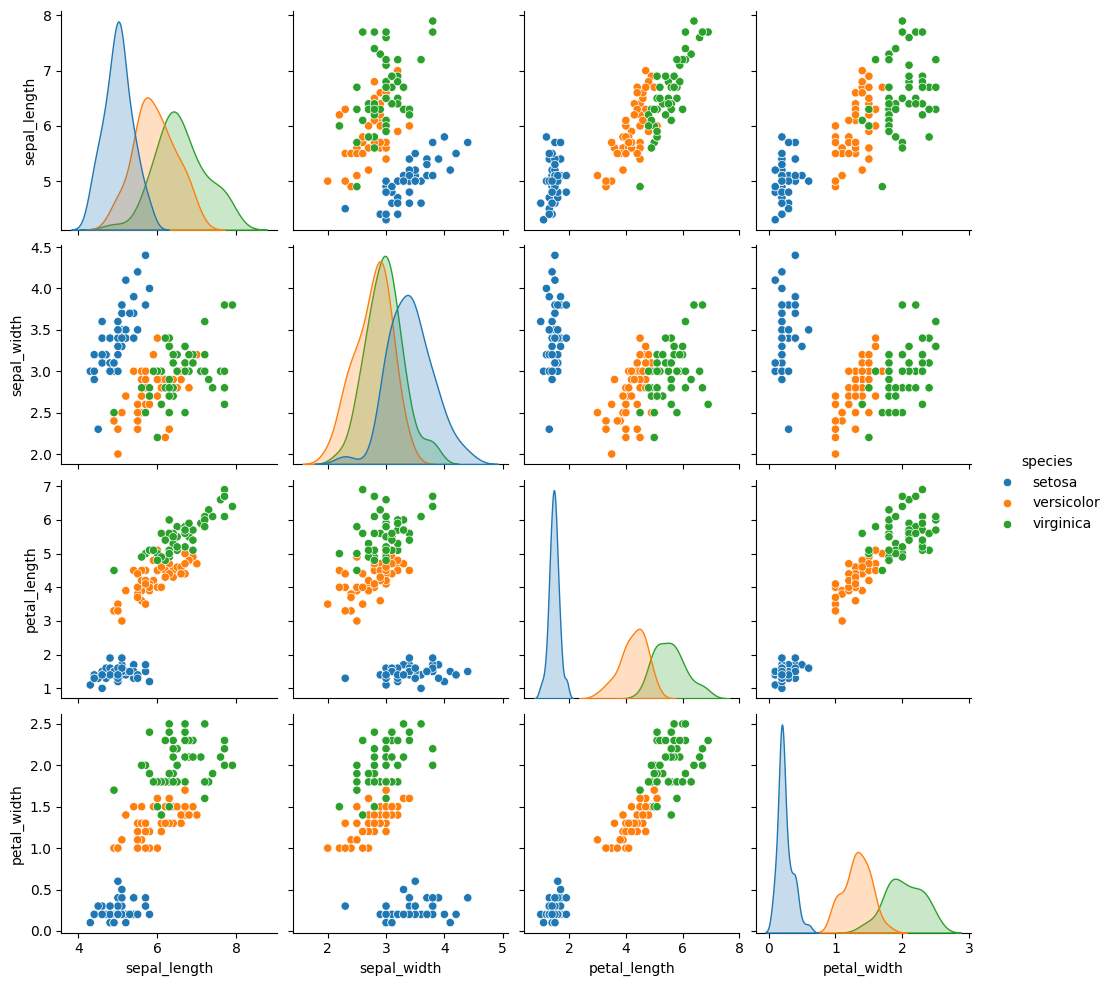

In [2]:
import seaborn as sns
sns.pairplot(df.iloc[:,:-1],hue='species')

## Project data into 2D with PCA

In [3]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
features = df.iloc[:,:-2]

pca = PCA(n_components=2)
components = pca.fit_transform(features)

fig = px.scatter(components, x=0, y=1, color=df['species'],labels={'0': 'PC 1', '1': 'PC 2'},width=1000,title='PCA iris')
fig.show()

## Project data into 3D with PCA

In [4]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
features = df.iloc[:,:-2]

pca = PCA(n_components=3)
components = pca.fit_transform(features)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components, x=0, y=1, z=2, color=df['species'],width=1000,title=f'Total Explained Variance: {total_var:.2f}%',labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

## Project data into 2D with t-SNE:  t-distributed Stochastic Neighbor Embedding

In [5]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [6]:
features = df.iloc[:,:-2]

tsne = TSNE(n_components=2, random_state=667)
projections = tsne.fit_transform(features)

fig = px.scatter(
    projections, x=0, y=1,
    color=df.species,width=1000,title='t-SNE iris')
fig.show()

## Project data into 3D with t-SNE

In [7]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

features = df.iloc[:,:-2]

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(projections, x=0, y=1, z=2,color=df.species,width=1000,title='T-Sne 3D Plot')
fig.update_traces(marker_size=8)
fig.show()

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/umapslap.jpg
" width="800">

In [8]:
!pip install umap-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


## UMAP(Uniform Manifold Approximation)
Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE.
According to the authors of UMAP, "The UMAP algorithm is competitive with t-SNE for visualization quality, and arguably preserves more of the global structure with superior run time performance. Furthermore, UMAP has no computational restrictions on embedding dimension, making it viable as a general purpose dimension reduction technique for machine learning."

Four things to note here:

- UMAP achieves comparable visualization performance with t-SNE.
- UMAP preserves more of the global structure. While the distance between the clusters formed in t-SNE does not have significant meaning, in UMAP the distance between clusters matters.
- UMAP is fast and can scale to Big Data.
- UMAP is not restricted for visualization-only purposes like t-SNE. It can serve as a general-purpose Dimensionality Reduction algorithm.
**Basically, UMAP is the t-SNE killer for most practical cases.*

## Projections data into 2D with UMAP



In [9]:
from umap import UMAP
import plotly.express as px

df = px.data.iris()
features = df.iloc[:, :-2]

umap_2d = UMAP(n_components=2, init='random', random_state=0)
proj_2d = umap_2d.fit_transform(features)

fig_2d = px.scatter(proj_2d, x=0, y=1,color=df.species,width=1000,title='UMAP iris')
fig_2d.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



## Projections data into 3D with UMAP

In [10]:
from umap import UMAP
import plotly.express as px

df = px.data.iris()
features = df.iloc[:, :-2]

umap_3d = UMAP(n_components=3, init='random', random_state=0)
proj_3d = umap_3d.fit_transform(features)
fig_3d = px.scatter_3d(proj_3d, x=0, y=1, z=2,color=df.species, labels={'color': 'species'},width=1000,title='UMAP-3D Plot')
fig_3d.update_traces(marker_size=5)

fig_3d.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



## MNIST Dataset

MNIST is a traditional clustering data set consisting of a set of 28x28 greyscale images of handwritten digits.  We will do the traditional thing with this data a treat the greyscale images as a 28x28 = 784 long vector and compute Euclidean distance between these vectors.

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/mnist.png
" width="800">

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE,Isomap
from sklearn.decomposition import PCA
from umap import UMAP

In [12]:
%%time
from sklearn.datasets import load_digits
mnist = load_digits()

CPU times: user 157 ms, sys: 17 ms, total: 174 ms
Wall time: 213 ms


In [13]:
data = mnist.data
labels = mnist.target
data.shape

(1797, 64)

In [14]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

## Confronto Finale

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/confrotntoDR.jpg' width=2000>

### PCA

The old standby of PCA which is blindingly fast to compute and often used as an initialization to many of the more complex algorithms.  This isn't really a competitor but instead should be thought of as a strawman.  Given that other algorithms initialize with these values one would hope that they can do better.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
u_pca = pca.fit_transform(data)

fig_2d = px.scatter(u_pca, u_pca[:,0], u_pca[:,1],color=labels, labels={'color': 'digits'},width=1000,title='PCA-2D Plot')
fig_2d.show()

In [16]:
pca = PCA(n_components=3)
u_pca = pca.fit_transform(data)

fig_3d = px.scatter_3d(u_pca,  u_pca[:,0], u_pca[:,1],u_pca[:,2],color=labels, labels={'color': 'digits'},width=1000,title='PCA-3D Plot')
fig_3d.update_traces(marker_size=5)

fig_3d.show()

### LDA
Linear Discriminant Analysis or LDA is a dimensionality reduction technique. It is used as a pre-processing step in Machine Learning and applications of pattern classification. The goal of LDA is to project the features in higher dimensional space onto a lower-dimensional space in order to avoid the curse of dimensionality and also reduce resources and dimensional costs.

The original technique was developed in the year 1936 by Ronald A. Fisher and was named Linear Discriminant or Fisher's Discriminant Analysis. The original Linear Discriminant was described as a two-class technique. The multi-class version was later generalized by C.R Rao as Multiple Discriminant Analysis. They are all simply referred to as the Linear Discriminant Analysis.

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import plotly.express as px

lda = LinearDiscriminantAnalysis(n_components=2)
u_lda = lda.fit_transform(data, labels)

fig_2d = px.scatter(u_lda, u_lda[:, 0], u_lda[:, 1], color=labels, labels={'color': 'digits'}, width=1000, title='LDA-2D Plot')
fig_2d.show()

In [18]:
lda = LinearDiscriminantAnalysis(n_components=3)
u_lda = lda.fit_transform(data, labels)

fig_3d = px.scatter_3d(u_lda,  u_lda[:,0], u_lda[:,1],u_lda[:,2],color=labels, labels={'color': 'digits'}, width=1000,title='LDA-3D Plot')
fig_3d.update_traces(marker_size=5)

fig_3d.show()

### T-SNE

In [19]:
fit_tsne = TSNE(n_components=2, random_state=667)
u_tsne = fit_tsne.fit_transform(data)

In [20]:
output = pd.DataFrame(u_tsne, columns=('x','y'))
output['labels']=labels
output

,x,y,labels
0,-2.870098,-55.614693,0
1,10.463552,11.559250,1
2,-13.523039,18.682852,2
3,-35.602619,-6.298151,3
4,40.824726,7.529725,4
...,...,...,...
1792,-23.471056,-17.299665,9
1793,3.268403,-50.278687,0
1794,-5.779712,10.500443,8
1795,-20.859484,-15.072051,9


In [21]:
fig_2d = px.scatter(u_tsne,u_tsne[:,0], u_tsne[:,1],color=labels, labels={'color': 'digits'},width=1000,title='T-Sne -2D Plot')
fig_2d.show()

In [22]:
fit_tsne = TSNE(n_components=3, random_state=667)
u_tsne = fit_tsne.fit_transform(data)

fig_3d = px.scatter_3d(u_tsne,  u_tsne[:,0], u_tsne[:,1],u_tsne[:,2],color=labels, labels={'color': 'digits'},width=1000,title='T-Sne -3D Plot')
fig_3d.update_traces(marker_size=5)
fig_3d.show()

### UMAP

In [23]:
fit = UMAP(n_components=2,n_neighbors=15, random_state=667, metric='euclidean')
u_umap = fit.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [24]:
output = pd.DataFrame(u_umap, columns=('x','y'))
output['labels']=labels
output

,x,y,labels
0,14.908957,9.796042,0
1,-4.490237,11.342294,1
2,6.226198,4.837883,2
3,-0.205705,7.254025,3
4,5.871289,18.458372,4
...,...,...,...
1792,-1.326041,4.199453,9
1793,15.826837,10.320527,0
1794,-3.681147,9.175156,8
1795,-1.529689,4.890799,9


In [25]:
fig_2d = px.scatter(u_umap,u_umap[:,0], u_umap[:,1],color=labels, labels={'color': 'digits'},width=1000,title='UMAP -2D Plot')
fig_2d.show()

In [26]:
fit = UMAP(n_components=3,n_neighbors=15, random_state=667, metric='euclidean')
u_umap = fit.fit_transform(data)

fig_3d = px.scatter_3d(u_umap,  u_umap[:,0], u_umap[:,1],u_umap[:,2],color=labels, labels={'color': 'digits'},width=1000,title='UMAP -3D Plot')
fig_3d.update_traces(marker_size=5)

fig_3d.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



### Isomap

Isomap stands for isometric mapping. Isomap is a non-linear dimensionality reduction method based on the spectral theory which tries to preserve the geodesic distances in the lower dimension. Isomap starts by creating a neighborhood network. After that, it uses graph distance to the approximate geodesic distance between all pairs of points. And then, through eigenvalue decomposition of the geodesic distance matrix, it finds the low dimensional embedding of the dataset. In non-linear manifolds, the Euclidean metric for distance holds good if and only if neighborhood structure can be approximated as linear. If neighborhood contains holes, then Euclidean distances can be highly misleading. In contrast to this, if we measure the distance between two points by following the manifold, we will have a better approximation of how far or near two points are

In [ ]:
fit_isomap = Isomap(n_components=2)
u_isomap = fit_isomap.fit_transform(data)

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.



In [ ]:
output = pd.DataFrame(u_isomap, columns=('x','y'))
output['labels']=labels
output

,x,y,labels
0,162.588812,27.219669,0
1,-46.792882,48.388880,1
2,-98.022312,21.772691,2
3,44.117875,-65.388256,3
4,29.773194,158.607053,4
...,...,...,...
1792,2.109484,-95.798260,9
1793,133.222794,68.794684,0
1794,-50.288018,-24.823011,8
1795,-1.688936,-72.022962,9


In [ ]:
fig_2d = px.scatter(u_isomap,u_isomap[:,0], u_isomap[:,1],color=labels, labels={'color': 'digits'},width=1000,title='Isomap -2D Plot')
fig_2d.show()

In [ ]:
fit_isomap = Isomap(n_components=3)
u_isomap = fit_isomap.fit_transform(data)

fig_3d = px.scatter_3d(u_isomap,  u_isomap[:,0], u_isomap[:,1],u_isomap[:,2],color=labels, labels={'color': 'digits'},width=1000,title='Isomap -3D Plot')
fig_3d.update_traces(marker_size=5)

fig_3d.show()

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning:

The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.

